# Importing the data and preparing it for modelling


In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
# Import data analysis tools 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
# If using Google Colab, this should output "Tesla T4" otherwise, 
# you won't be able to use mixed precision training
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-05b1b136-1d8f-4ad1-7533-a1609542d5d2)


In [75]:
# Import the training and validation set
df = pd.read_csv("/content/drive/MyDrive/titanic/train.csv")

In [76]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
# No parse_dates... check dtype of "saledate"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


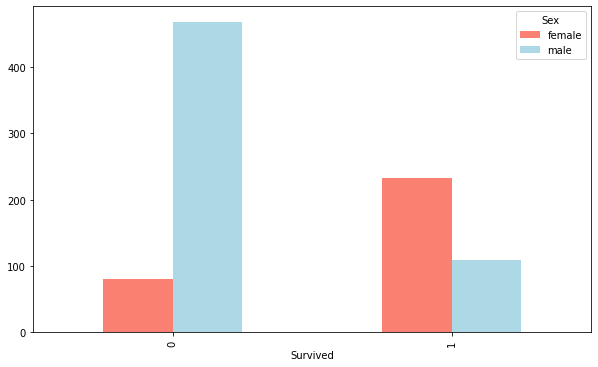

In [78]:
# Create a plot
pd.crosstab(df.Survived, df.Sex).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["salmon", "lightblue"]);

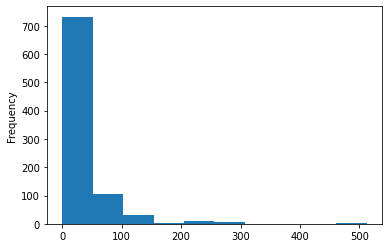

In [79]:
df.Fare.plot.hist()

In [80]:
df.head().T


,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [81]:
df.Pclass.value_counts()


3    491
1    216
2    184
Name: Pclass, dtype: int64

In [82]:
df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Convert strings to categories


In [83]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Name
Sex
Ticket
Cabin
Embarked


In [84]:
# This will turn all of the string values into category values
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    category
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    category
 11  Embarked     889 non-null    category
dtypes: category(5), float64(2), int64(5)
memory usage: 122.0 KB


In [86]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
df.to_csv("/content/drive/MyDrive/titanic/train.csv",
              index=False)

In [88]:
df_tmp = pd.read_csv("/content/drive/MyDrive/titanic/train.csv",
                     low_memory=False)
df_tmp.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    category
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    category
 11  Embarked     889 non-null    category
dtypes: category(5), float64(2), int64(5)
memory usage: 122.0 KB


In [90]:
# Check missing values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [91]:
# Check for which numeric columns have null values
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Age


In [92]:
 #Fill numeric rows with the median
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells if the data was missing our not
            df[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median since it's more robust than the mean
            df[label] = content.fillna(content.median())

In [93]:
df.isna().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
Age_is_missing      0
dtype: int64

In [94]:
# Check if there's any null values
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [95]:
# Turn categorical variables into numbers
for label, content in df.items():
    # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to inidicate whether sample had missing value
        df[label+"_is_missing"] = pd.isnull(content)
        # We add the +1 because pandas encodes missing categories as -1
        df[label] = pd.Categorical(content).codes+1   

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          891 non-null    int64  
 1   Survived             891 non-null    int64  
 2   Pclass               891 non-null    int64  
 3   Name                 891 non-null    int16  
 4   Sex                  891 non-null    int8   
 5   Age                  891 non-null    float64
 6   SibSp                891 non-null    int64  
 7   Parch                891 non-null    int64  
 8   Ticket               891 non-null    int16  
 9   Fare                 891 non-null    float64
 10  Cabin                891 non-null    int16  
 11  Embarked             891 non-null    int8   
 12  Age_is_missing       891 non-null    bool   
 13  Name_is_missing      891 non-null    bool   
 14  Sex_is_missing       891 non-null    bool   
 15  Ticket_is_missing    891 non-null    boo

In [97]:
df.isna().sum()

PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                  0
Embarked               0
Age_is_missing         0
Name_is_missing        0
Sex_is_missing         0
Ticket_is_missing      0
Cabin_is_missing       0
Embarked_is_missing    0
dtype: int64

In [98]:
df.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,109,191,354,273,16
Sex,2,1,1,1,2
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,524,597,670,50,473
Fare,7.25,71.2833,7.925,53.1,8.05


In [99]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [100]:
pd.crosstab(df.Survived, df.Sex)


Sex,1,2
Survived,,
0,81,468
1,233,109


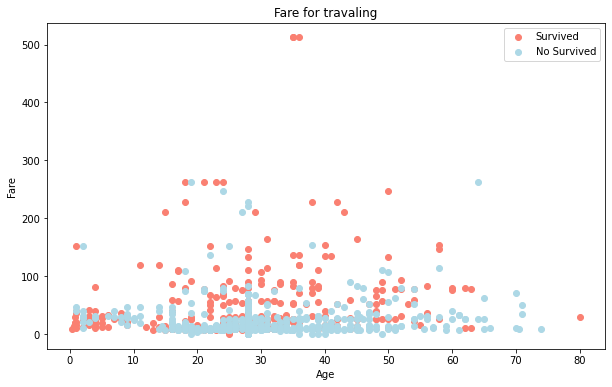

In [101]:
# Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.Age[df.Survived==1], 
            df.Fare[df.Survived==1], 
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.Age[df.Survived==0], 
            df.Fare[df.Survived==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Fare for travaling")
plt.xlabel("Age")
plt.legend(["Survived", "No Survived"])
plt.ylabel("Fare");

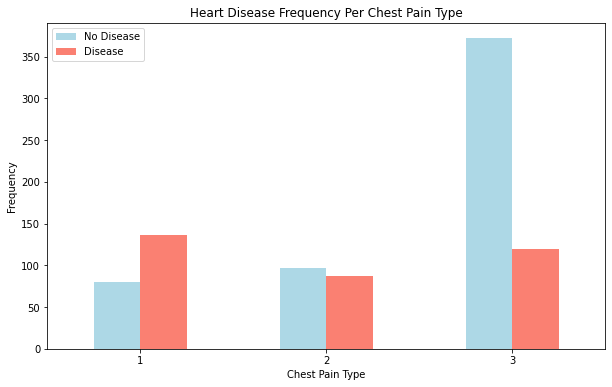

In [102]:
# Create a new crosstab and base plot
pd.crosstab(df.Pclass, df.Survived).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon"])

# Add attributes to the plot to make it more readable
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

In [103]:
# Everything except target variable
X = df.drop("Survived", axis=1)

# Target variable
y = df.Survived.values

In [104]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_val, y_train, y_val = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

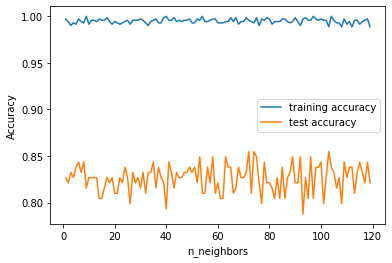

In [105]:
training_accuracy = [] 
test_accuracy = []
# try n_neighbors from 1 to 10 
neighbors_settings = range(1, 120)
for n_neighbors in neighbors_settings:
  kl = RandomForestClassifier(n_estimators=20) 
  kl.fit(X_train, y_train)
  training_accuracy.append(kl.score(X_train, y_train)) 
  test_accuracy.append(kl.score(X_val, y_val))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")

plt.legend()

In [106]:
import sys
!{sys.executable} -m pip install mglearn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [107]:
pip install pygame


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
from termcolor import colored
warnings.filterwarnings("ignore")

## Constants
color_palettes = ['#3c79e1', '#4c6b7d', '#e5e9ec', '#1f2c2c', '#20ADD0', '#4A8670']
background_color = "#b1b1b1"
font = 'cursive'

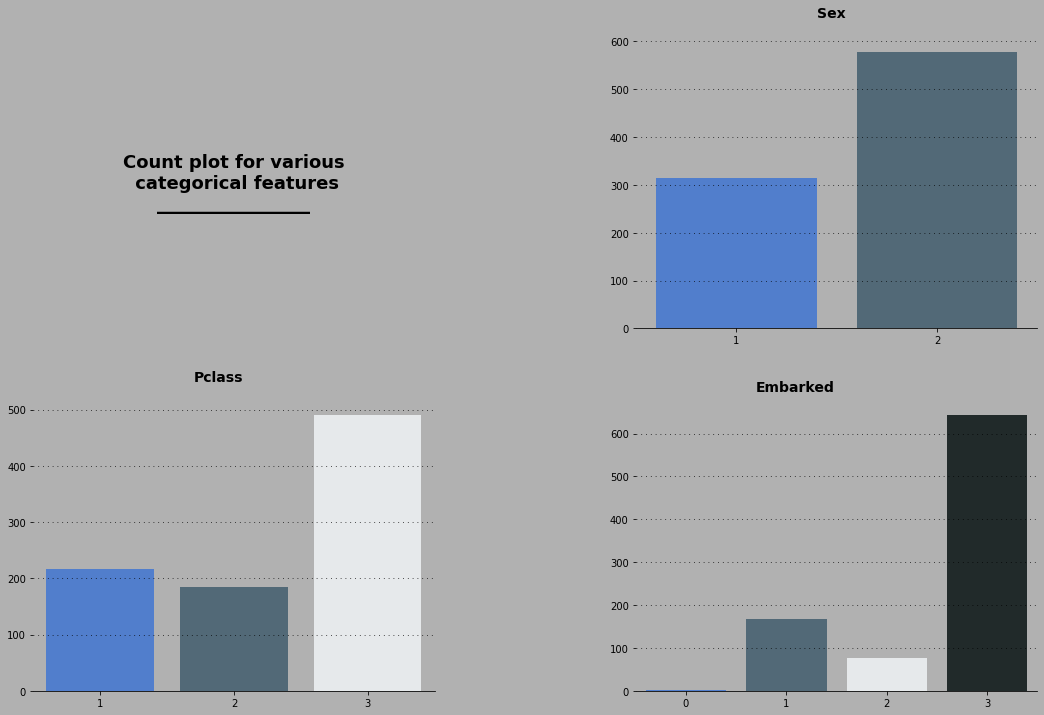

In [109]:
fig = plt.figure(figsize=(18,12))
gs = fig.add_gridspec(2,2)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])


fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='cursive',
         color="#000000")

# Sex Count
ax1.text(0.4, 650, 'Sex', fontsize=14, fontweight='bold', fontfamily='cursive', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x='Sex',palette=color_palettes)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Pclass Count
ax2.text(0.7, 550, 'Pclass', fontsize=14, fontweight='bold', fontfamily='cursive', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df,x='Pclass',palette=color_palettes)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Embarked Count
ax3.text(0.7, 700, 'Embarked', fontsize=14, fontweight='bold', fontfamily='cursive', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df,x='Embarked',palette=color_palettes)
ax3.set_xlabel("")
ax3.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)

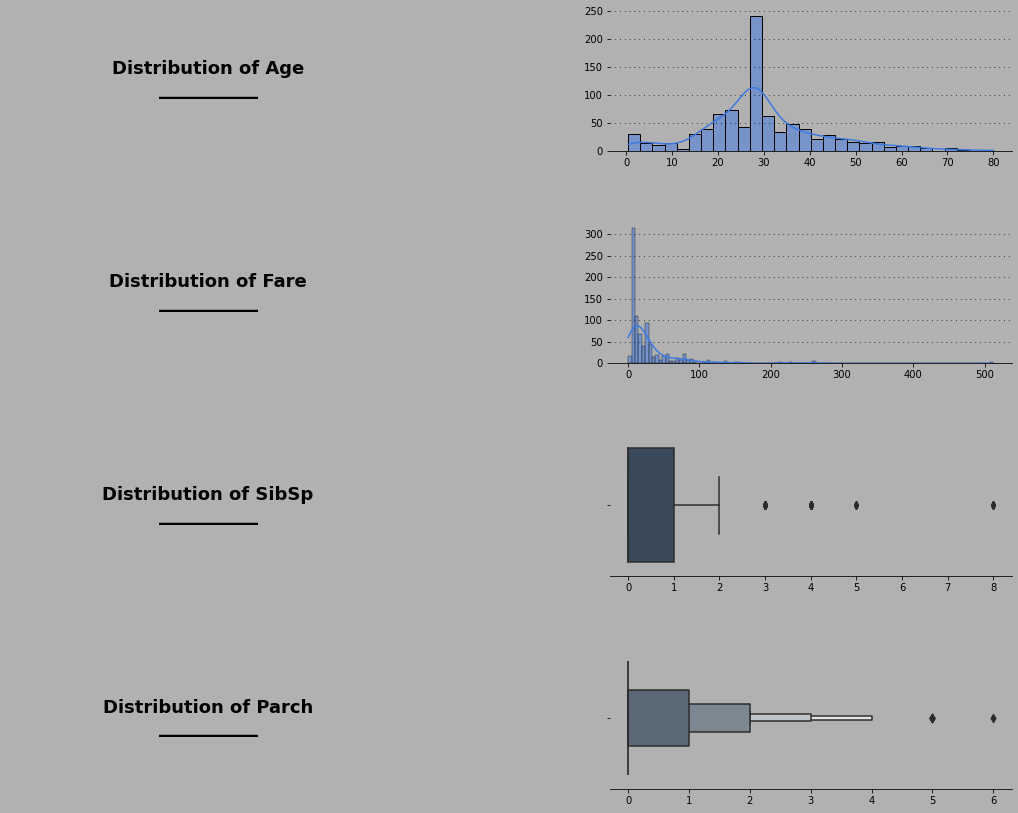

In [110]:
fig = plt.figure(figsize=(18, 30))
gs = fig.add_gridspec(8,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])


fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)

# Age title
ax0.text(0.5,0.5,"Distribution of Age\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='cursive',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax1,x=df['Age'],color="#3c79e1",kde=True)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Fare title
ax2.text(0.5,0.5,"Distribution of Fare\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='cursive',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# Fare
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax3,x=df['Fare'],color="#3c79e1", kde=True)
ax3.set_xlabel("")
ax3.set_ylabel("")

# SibSp title
ax4.text(0.5,0.5,"Distribution of SibSp\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='cursive',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# SibSp
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax5,x=df['SibSp'],color="#34495E")
ax5.set_xlabel("")
ax5.set_ylabel("")

# Parch title
ax6.text(0.5,0.5,"Distribution of Parch\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='cursive',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Parch
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax7,x=df['Parch'],color="#34495E")
ax7.set_xlabel("")
ax7.set_ylabel("")


for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)

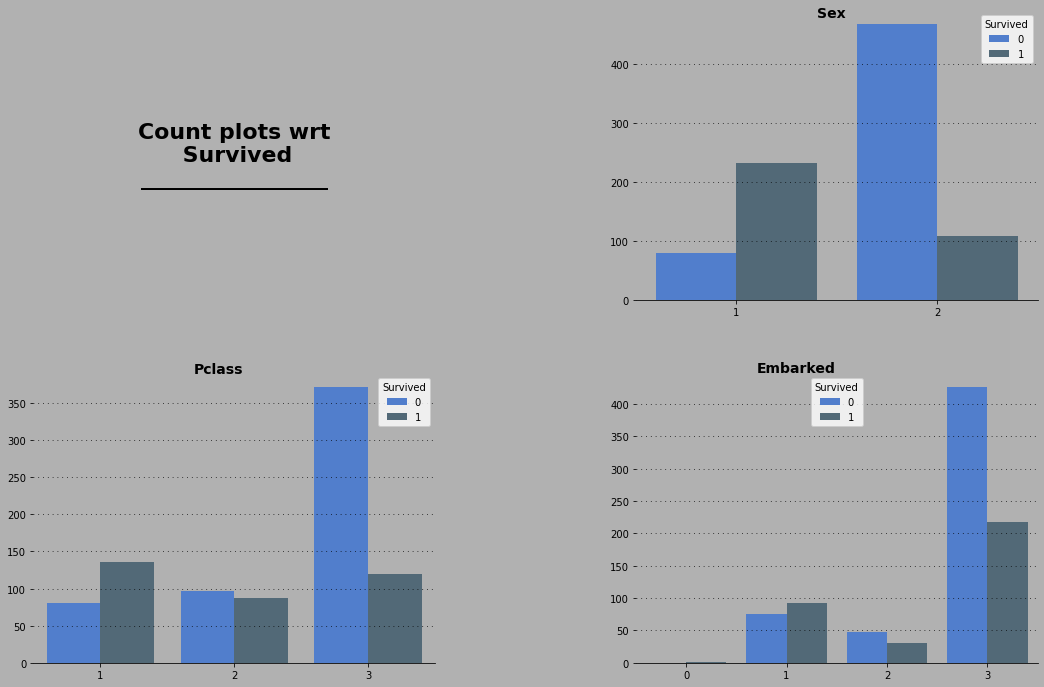

In [111]:
fig = plt.figure(figsize=(18,12))
gs = fig.add_gridspec(2,2)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])


fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plots wrt\n Survived\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=22, fontweight='bold',
         fontfamily='cursive',
         color="#000000")

# Sex Count
ax1.text(0.4, 480, 'Sex', fontsize=14, fontweight='bold', fontfamily='cursive', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x='Sex', hue='Survived',palette=color_palettes)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Pclass Count
ax2.text(0.7, 390, 'Pclass', fontsize=14, fontweight='bold', fontfamily='cursive', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df,x='Pclass', hue='Survived', palette=color_palettes)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Embarked Count
ax3.text(0.7, 450, 'Embarked', fontsize=14, fontweight='bold', fontfamily='cursive', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df,x='Embarked', hue='Survived',palette=color_palettes)
ax3.set_xlabel("")
ax3.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)

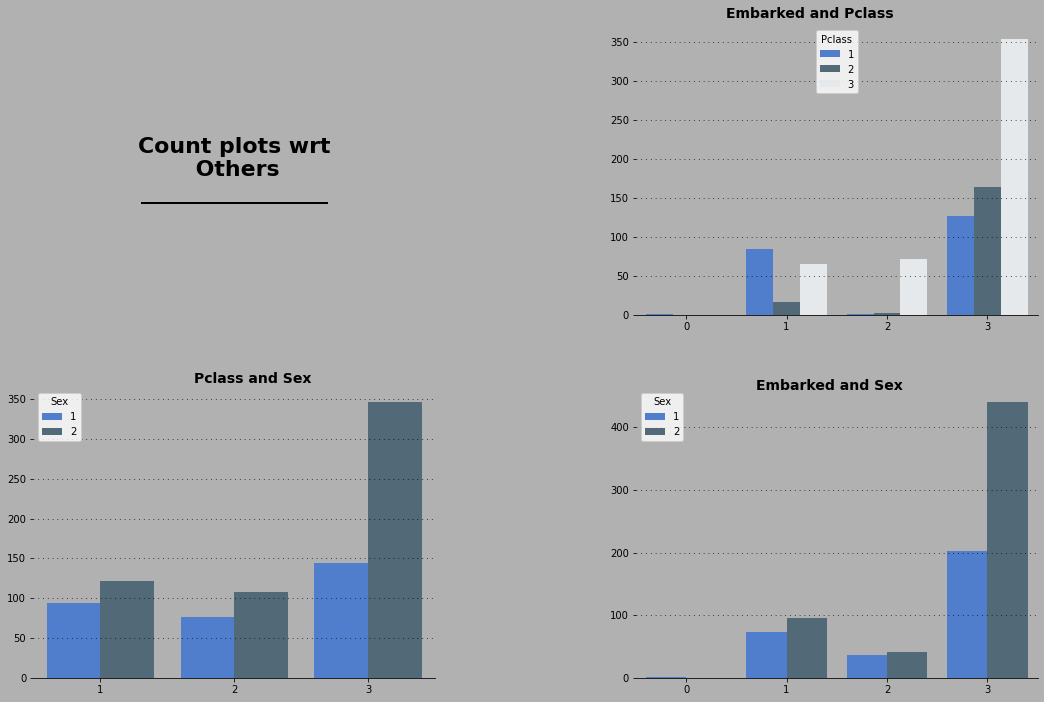

In [112]:
fig = plt.figure(figsize=(18,12))
gs = fig.add_gridspec(2,2)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])


fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plots wrt\n Others\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=22, fontweight='bold',
         fontfamily='cursive',
         color="#000000")

# Embarked and Pclass
ax1.text(0.4, 380, 'Embarked and Pclass', fontsize=14, fontweight='bold', fontfamily='cursive', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x='Embarked', hue='Pclass',palette=color_palettes)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Pclass Count
ax2.text(0.7, 370, 'Pclass and Sex', fontsize=14, fontweight='bold', fontfamily='cursive', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df,x='Pclass', hue='Sex', palette=color_palettes)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Embarked Count
ax3.text(0.7, 460, 'Embarked and Sex', fontsize=14, fontweight='bold', fontfamily='cursive', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df,x='Embarked', hue='Sex',palette=color_palettes)
ax3.set_xlabel("")
ax3.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)

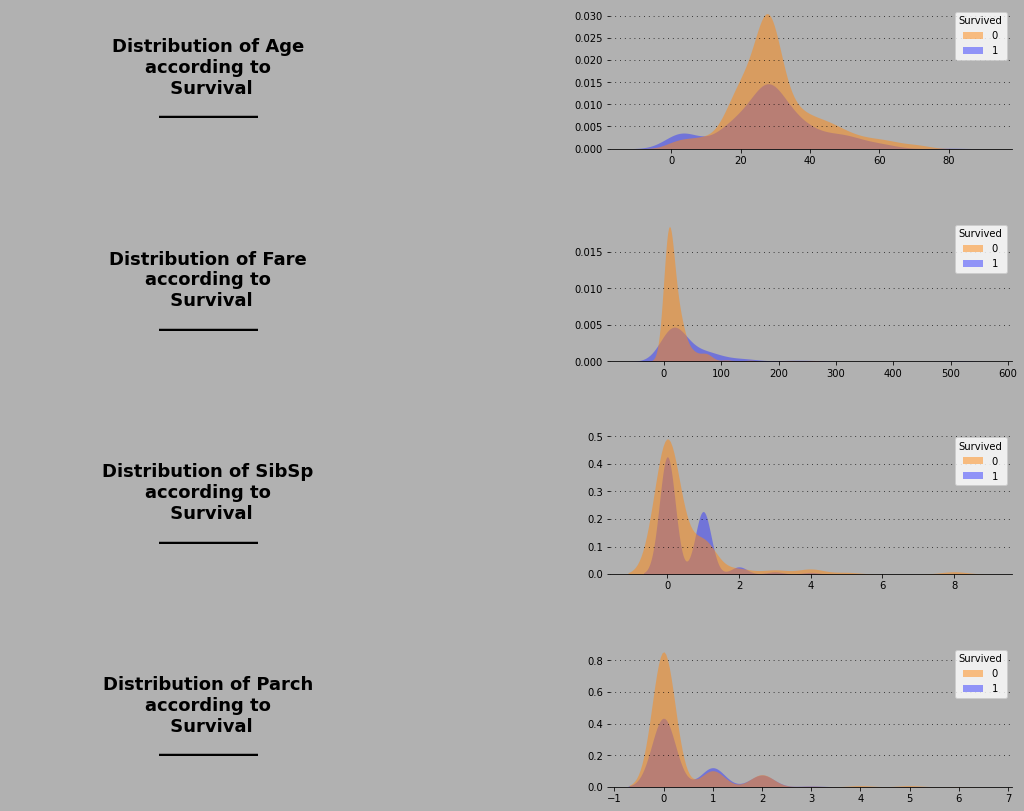

In [113]:
fig = plt.figure(figsize=(18, 30))
gs = fig.add_gridspec(8,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])

fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)

# Age title
ax0.text(0.5,0.5,"Distribution of Age\naccording to\n Survival\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='cursive',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='Age',hue="Survived", fill=True,palette=["#ff8811","#3339FF"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Fare title
ax2.text(0.5,0.5,"Distribution of Fare\naccording to\n Survival\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# Fare
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='Fare',hue="Survived", fill=True,palette=["#ff8811","#3339FF"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# SibSp title
ax4.text(0.5,0.5,"Distribution of SibSp\naccording to\n Survival\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='cursive',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# SibSp
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=df, x='SibSp',hue="Survived", fill=True,palette=["#ff8811","#3339FF"], alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Parch title
ax6.text(0.5,0.5,"Distribution of Parch\naccording to\n Survival\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='cursive',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Parch
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df, x='Parch',hue="Survived", fill=True,palette=["#ff8811","#3339FF"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")


for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)

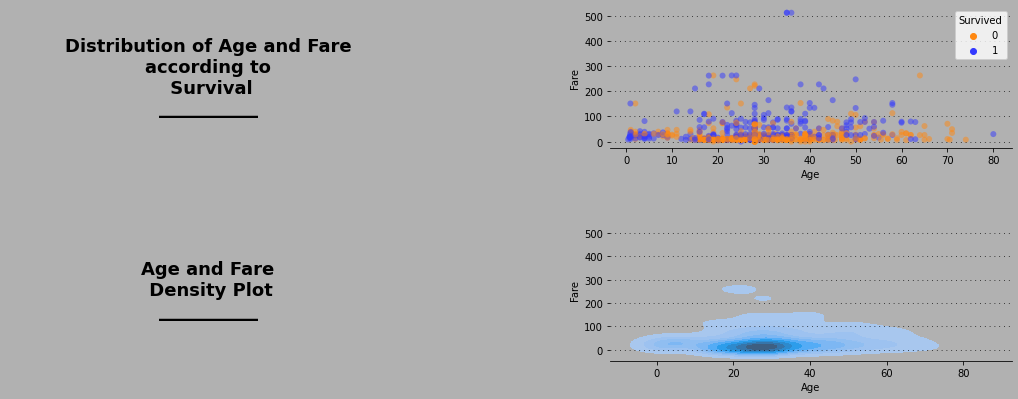

In [114]:
fig = plt.figure(figsize=(18, 30))
gs = fig.add_gridspec(8,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])


fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)


# ScatterPlot Title
ax0.text(0.5,0.5,"Distribution of Age and Fare\naccording to\n Survival\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='cursive',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Age and Fare ScatterPlot
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.scatterplot(ax=ax1, data=df, x='Age',y='Fare', hue="Survived",palette=["#ff8811","#3339FF"], alpha=.5, linewidth=0)
ax1.set_xlabel("Age")
ax1.set_ylabel("Fare")


# Density Plot Title
ax2.text(0.5,0.5,"Age and Fare\n Density Plot\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='cursive',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# Age and Fare Density Plot
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='Age',y="Fare", fill=True,palette=["#ff8811","#3339FF"])
ax3.set_xlabel("Age")
ax3.set_ylabel("Fare")


for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)

In [115]:
fig = px.scatter_3d(df, x='Fare', y='Age', z='Sex',
              color='Survived',size_max=18,color_continuous_scale=['#e5e9ec', '#3c79e1'])
fig.update_layout({"template":"plotly_dark"})
fig.show()

In [116]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_is_missing,Name_is_missing,Sex_is_missing,Ticket_is_missing,Cabin_is_missing,Embarked_is_missing
PassengerId,1.000000e+00,-0.005007,-0.035144,-0.038559,0.042939,0.034212,-0.057527,-0.001652,-0.056554,0.012658,-0.000637,0.012985,-0.020167,NaN,NaN,NaN,-0.019919,-6.756184e-19
Survived,-5.006661e-03,1.000000,-0.338481,-0.057343,-0.543351,-0.064910,-0.035322,0.081629,-0.164549,0.257307,0.276235,-0.176509,-0.092197,NaN,NaN,NaN,-0.316912,6.009485e-02
Pclass,-3.514399e-02,-0.338481,1.000000,0.052831,0.131900,-0.339898,0.083081,0.018443,0.319869,-0.549500,-0.537419,0.173511,0.172933,NaN,NaN,NaN,0.725541,-7.428233e-02
Name,-3.855886e-02,-0.057343,0.052831,1.000000,0.020314,0.048252,-0.017230,-0.049105,0.047348,-0.049173,0.003122,-0.010633,0.175366,NaN,NaN,NaN,0.033960,2.581697e-02
Sex,4.293888e-02,-0.543351,0.131900,0.020314,1.000000,0.081163,-0.114631,-0.245489,0.059372,-0.182333,-0.137704,0.118492,0.055215,NaN,NaN,NaN,0.140391,-6.429648e-02
Age,3.421211e-02,-0.064910,-0.339898,0.048252,0.081163,1.000000,-0.233296,-0.172482,-0.070382,0.096688,0.164550,-0.031903,-0.052098,NaN,NaN,NaN,-0.240314,7.522869e-02
SibSp,-5.752683e-02,-0.035322,0.083081,-0.017230,-0.114631,-0.233296,1.000000,0.414838,0.079461,0.159651,-0.024829,0.071480,0.018958,NaN,NaN,NaN,0.040460,-2.250825e-02
Parch,-1.652012e-03,0.081629,0.018443,-0.049105,-0.245489,-0.172482,0.414838,1.000000,0.020003,0.216225,0.033585,0.043351,-0.124104,NaN,NaN,NaN,-0.036987,-2.246691e-02
Ticket,-5.655365e-02,-0.164549,0.319869,0.047348,0.059372,-0.070382,0.079461,0.020003,1.000000,-0.013885,-0.176515,0.011146,0.031241,NaN,NaN,NaN,0.249303,-7.242787e-02
Fare,1.265822e-02,0.257307,-0.549500,-0.049173,-0.182333,0.096688,0.159651,0.216225,-0.013885,1.000000,0.310987,-0.230365,-0.100707,NaN,NaN,NaN,-0.482075,4.564557e-02


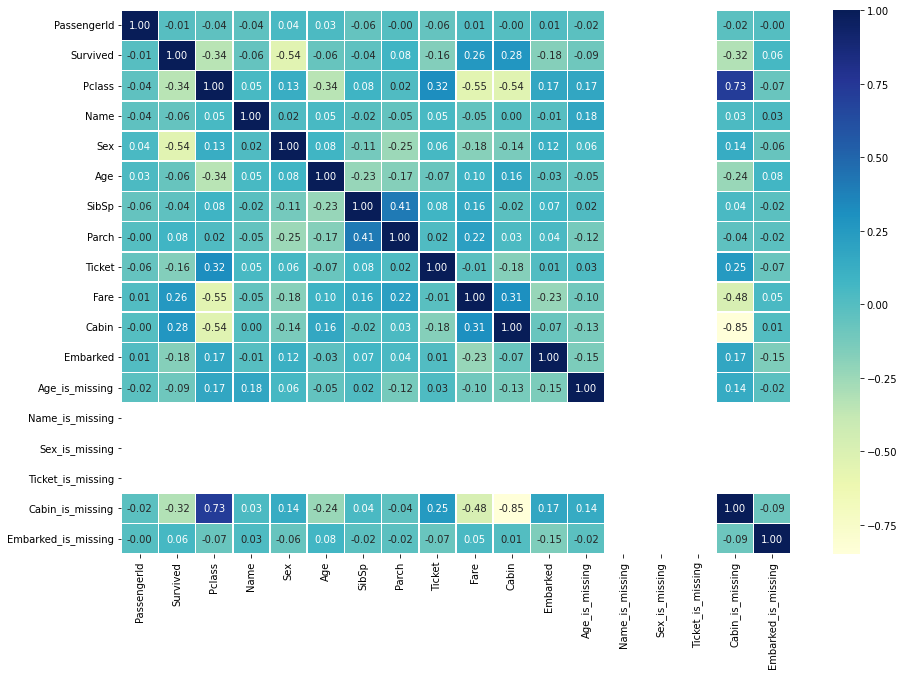

In [117]:
# Let's make it look a little prettier
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

In [118]:
# Everything except target variable
X = df.drop("Survived", axis=1)

# Target variable
y = df.Survived.values

In [119]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_val, y_train, y_val = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

In [120]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_val, y_train, y_val):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_val, y_val)
    return model_scores

In [121]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_val=X_val,
                             y_train=y_train,
                             y_val=y_val)
model_scores

{'KNN': 0.659217877094972,
 'Logistic Regression': 0.7206703910614525,
 'Random Forest': 0.8435754189944135}

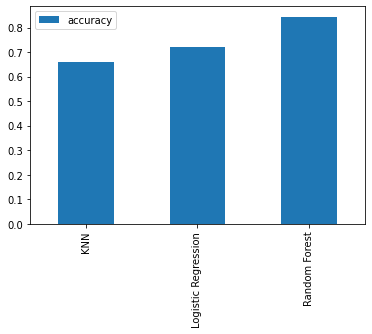

In [122]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();


#  Hyperparameter tuning and cross-validation
### Tuning models with with RandomizedSearchCV



In [123]:
# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [124]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [125]:
# Find the best parameters
rs_rf.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 18,
 'n_estimators': 910}

In [126]:
 # Evaluate the randomized search random forest model
rs_rf.score(X_val, y_val)


0.8268156424581006

SyntaxError: ignored